source：https://github.com/AlexLynd/ESP8266-Wardriving

the dataset: gathered the data by walking around with WiGLE, exported to csv

the task: filter data by different criteria, plot on the map

In [ ]:
import numpy as np
import pandas as pd
import folium
from folium import Map, Marker
import random
import matplotlib.pyplot as plt
color_list = ['black', 'darkblue', 'cadetblue', 'pink', 'darkred', 'white', 'orange', 'purple', 'lightblue', 'darkpurple', 'gray', 'red', 'lightgray', 'lightred', 'green', 'darkgreen', 'beige', 'lightgreen', 'blue']
from tqdm import tqdm
import time
plt.rcParams['font.sans-serif']=['STSong'] #Show Chinese label
plt.rcParams['axes.unicode_minus']=False   #These two lines need to be set manually
import datetime

In [ ]:
def importdataset():
    global wd
    wd = pd.read_csv ('WigleWifi_20210908205108.csv', skiprows=1) 
    # wd["MAC"]= wd["MAC"].str.lower()
    print(f"total devices: {len(wd)}") # number of detected devices

# explore and clean the data

In [ ]:
importdataset()
wd.sample(5)

In [ ]:
wd["MAC"].value_counts()

In [ ]:
#take a look how many unique valid MACs are there and how many entries in total
wd.loc[(wd['MAC'].str.len() == 17)]["MAC"].describe()

In [ ]:
print(f"number of unique APs: {len(wd['MAC'].unique())}")

In [ ]:
pd.DataFrame (wd['MAC'].unique())

In [ ]:
pd.DataFrame (wd.loc[(wd['MAC'].str.len() == 17)]["MAC"])

# plot all WCDMA towers

In [ ]:
importdataset()
wd.sample(5)

In [ ]:
# drop all else except WCDMA
wd = pd.DataFrame( wd.loc[wd['Type'] == "WCDMA"] )
wd = wd.reset_index(drop=True)
wd.sample(5)

In [ ]:
wd['MAC'].value_counts()

In [ ]:
#color code different MACs
wd["Color"] = None
for index, row in wd.iterrows():
    if wd['Color'][index] == None:
        wd.loc[wd['MAC'] == wd['MAC'][index],"Color"] = random.choice(color_list)

In [ ]:
pd.DataFrame (wd, columns=['Color','MAC']).value_counts()

In [ ]:
lat = wd["CurrentLatitude"][0]
lon = wd["CurrentLongitude"][0]
basic_map = folium.Map(location=[lat, lon],zoom_start=17) # manually pick scope of map

# folium.PolyLine(wd[['CurrentLatitude', 'CurrentLongitude']].values.tolist(),line_opacity = 0.5, weight = 4).add_to(basic_map) # plot route

# add markers for every point in dataset 
for i in range(len(wd)): 
#     if wd["FirstSeen"][i] > "2021-8-21 18:43:25" and wd["FirstSeen"][i] < "2021-8-21 18:46:58": # add time filter
#     if wd["RSSI"][i] > 10:
    if wd.loc[wd['MAC'] == wd['MAC'][i],"RSSI"].max() == wd["RSSI"][i]:# only plot with highest signal strength
        lat = wd["CurrentLatitude"][i]
        lon = wd["CurrentLongitude"][i] 
        folium.Marker( location=[lat, lon], tooltip=f'MAC {wd["MAC"][i]}, strength {wd["RSSI"][i]}', icon=folium.Icon(icon="wifi", color=wd["Color"][i], prefix='fa') ).add_to(basic_map) # annotate GPS location w/ SSID
print(f"total towers: {len(wd['MAC'].unique())}")        
display(basic_map)

# 

# 

# 

# plot all WIFI APs with highest signal strength

In [ ]:
importdataset()
wd.sample(5)

In [ ]:
#drop everything except those having valid MACs
wd = wd.loc[(wd['MAC'].str.len() == 17)]
wd = wd.reset_index(drop=True)
wd.sample(5)

In [ ]:
wd.info()

In [ ]:
print(f"total APs: {len(wd['MAC'].unique())}") 

In [ ]:
LOOKING_FOR = 'SSID'
lat = wd["CurrentLatitude"][0]
lon = wd["CurrentLongitude"][0]
basic_map = folium.Map(location=[lat, lon],zoom_start=17) # manually pick scope of map

# add markers for every point in dataset 
for i in range(len(wd)): 
    if wd.loc[wd[LOOKING_FOR] == wd[LOOKING_FOR][i],"RSSI"].max() == wd["RSSI"][i]: # only plot AP with highest signal strength
        lat = wd["CurrentLatitude"][i]
        lon = wd["CurrentLongitude"][i]
        folium.Marker( location=[lat, lon], tooltip=f'{LOOKING_FOR} {wd[LOOKING_FOR][i]}, strength {wd["RSSI"][i]}', icon=folium.Icon(icon="wifi", color="blue", prefix='fa') ).add_to(basic_map) # annotate GPS location w/ SSID
print(f"total APs: {len(wd['MAC'].unique())}")    
display(basic_map)

# 

# 

# 

# 

# plot all WPS-enabled wifi with highest signal strength

In [ ]:
importdataset()
wd.sample(5)

In [ ]:
wd['AuthMode'].value_counts()

In [ ]:
# make a sorted list of authmodes used
wd_sorted_list = pd.DataFrame (wd, columns=['AuthMode']).value_counts().rename_axis('Auth_sorted').reset_index(name='counts')
wd_sorted_list

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = wd_sorted_list['Auth_sorted']
sizes = wd_sorted_list['counts']

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
ap_use_wps=len(pd.DataFrame( wd.loc[(wd['AuthMode'].str.contains('WPS')==True)]))
ap_other=len(wd)-ap_use_wps
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = "other APs", "APs that use WPS"
sizes = [ap_other, ap_use_wps]

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# drop all except those that use WPS
wd = pd.DataFrame( wd.loc[lambda x: (wd['AuthMode'].str.contains('WPS')==True), :])
wd = wd.reset_index(drop=True)
wd.sample(5)

In [ ]:
wd.info()

In [ ]:
wd['AuthMode'].value_counts()

In [ ]:
# make a sorted list of authmodes used
wd_sorted_list = pd.DataFrame (wd, columns=['AuthMode']).value_counts().rename_axis('Auth_sorted').reset_index(name='counts')
wd_sorted_list

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = wd_sorted_list['Auth_sorted']
sizes = wd_sorted_list['counts']

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
#color code authmodes
wd["Color"] = None
for index, row in wd.iterrows():
    if wd['Color'][index] == None:
        wd.loc[wd['AuthMode'] == wd['AuthMode'][index],"Color"] = random.choice(color_list)

In [ ]:
pd.DataFrame (wd, columns=['Color','AuthMode']).value_counts()

In [ ]:
LOOKING_FOR = 'SSID'
lat = wd["CurrentLatitude"][0]
lon = wd["CurrentLongitude"][0]
basic_map = folium.Map(location=[lat, lon],zoom_start=17) # manually pick scope of map

# add markers for every point in dataset 
for i in range(len(wd)): 

    if wd.loc[wd[LOOKING_FOR] == wd[LOOKING_FOR][i],"RSSI"].max() == wd["RSSI"][i]: # only plot AP with highest signal strength
        lat = wd["CurrentLatitude"][i]
        lon = wd["CurrentLongitude"][i]
        folium.Marker( location=[lat, lon], tooltip=f'{LOOKING_FOR} {wd[LOOKING_FOR][i]}, strength {wd["RSSI"][i]}', icon=folium.Icon(icon="wifi", color=wd["Color"][i], prefix='fa') ).add_to(basic_map) # annotate GPS location w/ SSID
print(f"total APs: {len(wd['MAC'].unique())}")    
display(basic_map)

### again, filter by those using WEP

In [ ]:
importdataset()

In [ ]:
wd = pd.DataFrame( wd.loc[lambda x: (wd['AuthMode'].str.contains('WEP')==True), :])
wd = wd.reset_index(drop=True)

In [ ]:
wd['AuthMode'].value_counts()

In [ ]:
wd

### another filter

In [ ]:
importdataset()

In [ ]:
wd = pd.DataFrame( wd.loc[~(wd['AuthMode'].str.contains('\[')==True)&~(wd['AuthMode'].str.contains('WCDMA')==True), :])
wd = wd.reset_index(drop=True)

In [ ]:
wd['AuthMode'].value_counts()

In [ ]:
wd

### another filter

In [ ]:
importdataset()

In [ ]:
wd.loc[(wd['Type'].str.contains('B')==True)]

In [ ]:
wd.loc[(wd['Type'].str.contains('GSM')==True)]

### plot GSM

In [ ]:
importdataset()

In [ ]:
wd = pd.DataFrame( wd.loc[(wd['Type'].str.contains('GSM')==True), :])
wd = wd.reset_index(drop=True)

In [ ]:
wd["Color"] = None
for index, row in wd.iterrows():
    if wd['Color'][index] == None:
        wd.loc[wd['MAC'] == wd['MAC'][index],"Color"] = random.choice(color_list)

In [ ]:
wd

In [ ]:
LOOKING_FOR = 'MAC'
lat = wd["CurrentLatitude"][0]
lon = wd["CurrentLongitude"][0]
basic_map = folium.Map(location=[lat, lon],zoom_start=17) # manually pick scope of map

# add markers for every point in dataset 
for i in range(len(wd)): 
    if wd.loc[wd[LOOKING_FOR] == wd[LOOKING_FOR][i],"RSSI"].max() == wd["RSSI"][i]: # only plot AP with highest signal strength
        lat = wd["CurrentLatitude"][i]
        lon = wd["CurrentLongitude"][i]
        folium.Marker( location=[lat, lon], tooltip=f'{LOOKING_FOR} {wd[LOOKING_FOR][i]}, strength {wd["RSSI"][i]}', icon=folium.Icon(icon="wifi", color=wd["Color"][i], prefix='fa') ).add_to(basic_map) # annotate GPS location w/ SSID
print(f"total APs: {len(wd['MAC'].unique())}")    
display(basic_map)

# find most popular vendors for WiFi devices nearby

In [181]:
importdataset()

total devices: 33772


In [182]:
# https://github.com/AlexLynd/ESP8266-Wardriving/blob/master/mac-vendors.txt
mac_vendors = pd.read_csv ('mac-vendors.csv', names=("MAC", "Vendor"),dtype=object) 
mac_vendors["MAC"]= mac_vendors["MAC"].str.lower()
mac_vendors

,MAC,Vendor
0,e0:43:db,"Shenzhen ViewAt Technology Co.,Ltd."
1,24:05:f5,Integrated Device Technology (Malaysia) Sdn. Bhd.
2,2c:30:33,NETGEAR
3,3c:d9:2b,Hewlett Packard
4,9c:8e:99,Hewlett Packard
...,...,...
23038,3c:7a:8a,"ARRIS Group, Inc."
23039,ac:ec:80,"ARRIS Group, Inc."
23040,2c:a1:7d,"ARRIS Group, Inc."
23041,04:71:4b,IEEE Registration Authority


In [ ]:
mac_vendors.loc[(mac_vendors['Vendor'].str.contains('TP-LINK'))].sort_values(by='MAC',ascending=True)#.values[0,0]

In [ ]:
mac_vendors['Vendor'].describe()

In [183]:
#drop everything except those having valid MACs
wd = wd.loc[(wd['MAC'].str.len() == 17)]

wd = wd.drop_duplicates(subset = ["MAC"])
wd = wd.reset_index(drop=True)
len(wd)

13718

In [204]:
wd.loc[0]['MAC'][:8]

'20:76:93'

In [219]:
wd['Vendor'] = None
iterations=0
start_time = time.time()
with tqdm(total=len(wd)) as bar:
    for index, row in wd.iterrows():
        bar.update(1)
        if wd.loc[index, 'Vendor'] == None:
            try:
                wd.loc[wd['MAC'].str.startswith(row['MAC'][:8]), 'Vendor'] = mac_vendors.loc[mac_vendors['MAC'] == row['MAC'][:8],"Vendor"].values[0]
                iterations+=1
            except:
                pass
print(f"it took  {time.time()-start_time:.2f} sec. to run the code")           
print(f"total rows: {len(wd)}, iterations: {iterations}, cells filled: {wd['Vendor'].count()}, unique vendors: {len(wd['Vendor'].unique())}")


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13718/13718 [00:37<00:00, 363.41it/s]

it took  37.75 sec. to run the code
total rows: 13718, iterations: 414, cells filled: 3767, unique vendors: 163


In [220]:
wd['Vendor'].isna().sum()

9951

In [221]:
wd['Vendor'].describe()

count                              3767
unique                              162
top       TP-LINK TECHNOLOGIES CO.,LTD.
freq                               1018
Name: Vendor, dtype: object

In [222]:
wd["Vendor"].value_counts().head(30)

TP-LINK TECHNOLOGIES CO.,LTD.                           1018
Tenda Technology Co.,Ltd.Dongguan branch                 246
HUAWEI TECHNOLOGIES CO.,LTD                              226
Qihoo  360  Technology Co.,Ltd                           222
Shenzhen Sundray Technologies Company Limited            165
Tenda Technology Co., Ltd.                               158
Phicomm (Shanghai) Co., Ltd.                             135
Shenzhen Bilian electronic CO.,LTD                       104
SHENZHEN MERCURY COMMUNICATION TECHNOLOGIES CO.,LTD.      83
Hangzhou H3C Technologies Co., Limited                    69
AMPAK Technology, Inc.                                    67
XIAOMI Electronics,CO.,LTD                                60
Shanghai Feixun Communication Co.,Ltd.                    57
SHANGHAI PHICOMM COMMUNICATION CO.,LTD                    55
SHENZHEN FAST TECHNOLOGIES CO.,LTD                        54
Midea Group Co., Ltd.                                     43
Asiarock Technology Limi

In [223]:
# make a sorted list of top vendors
wd_sorted_list = pd.DataFrame (wd, columns=['Vendor']).value_counts().rename_axis('Vendor_sorted').reset_index(name='counts')
wd_sorted_list

,Vendor_sorted,counts
0,"TP-LINK TECHNOLOGIES CO.,LTD.",1018
1,"Tenda Technology Co.,Ltd.Dongguan branch",246
2,"HUAWEI TECHNOLOGIES CO.,LTD",226
3,"Qihoo 360 Technology Co.,Ltd",222
4,Shenzhen Sundray Technologies Company Limited,165
...,...,...
157,Shenzhen Four Seas Global Link Network Technol...,1
158,Shenzhen Kezhonglong Optoelectronic Technology...,1
159,"Dalian Hi-Think Computer Technology, Corp",1
160,"Shenzhen Tencent Computer System Co., Ltd.",1


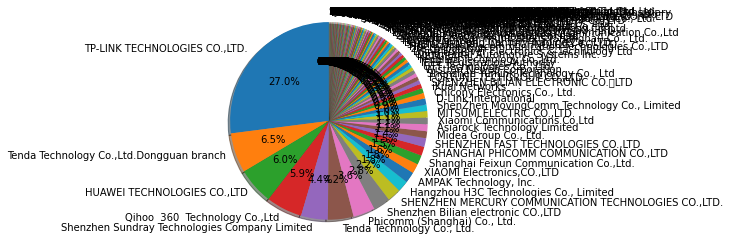

In [225]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = wd_sorted_list['Vendor_sorted']
sizes = wd_sorted_list['counts']

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()